# <span style="color:white; font-size:1.4em;">Завдання 1</span>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("Mall_Customers.csv")

display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
print("Інформація про DataFrame:")
df.info()

print("\nСтатистичні показники:")
print(df.describe())

print("\nКількість пропусків у кожному стовпці:")
print(df.isnull().sum())

Інформація про DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Статистичні показники:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000             

In [4]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

display(features.head())


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Опціолнально можна було вибрати ознаку `Age`, але вона спотворює візуальний результат k-Means кластерізації, тому її обрано не було

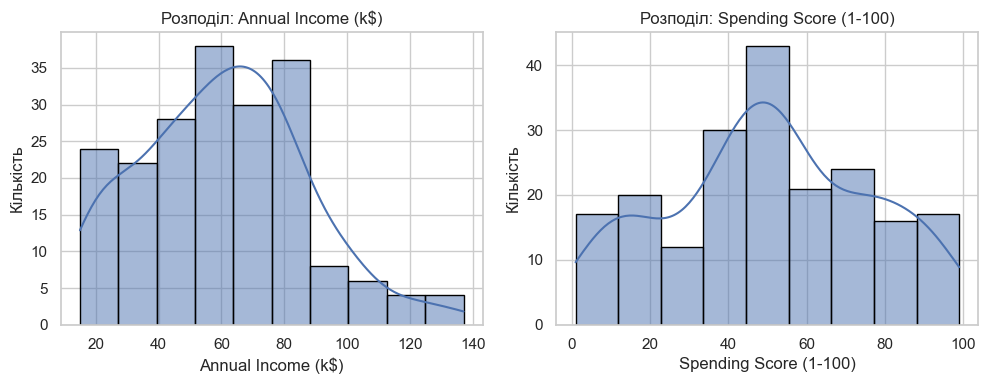

In [5]:
sns.set(style="whitegrid")

columns = ['Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 4))
for i, column in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=features, x=column, kde=True, edgecolor='black')
    plt.title(f'Розподіл: {column}')
    plt.xlabel(column)
    plt.ylabel('Кількість')

plt.tight_layout()
plt.show()

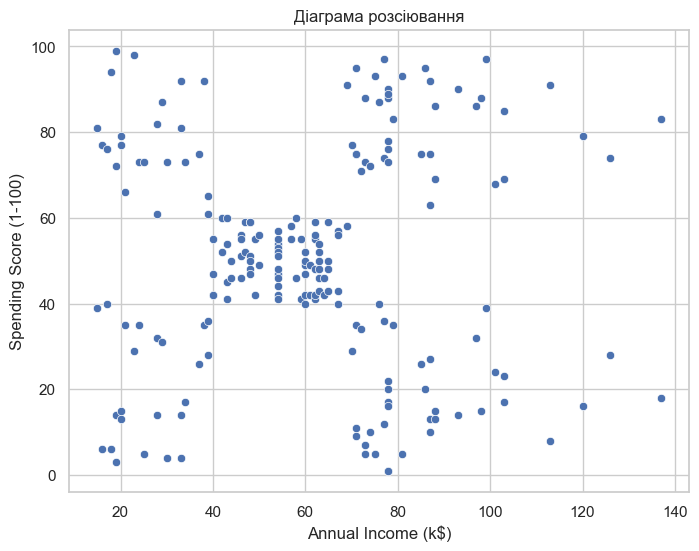

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=features, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Діаграма розсіювання')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

### З діаграми розсіювання ознак `Annual Income (k$)` та `Spending Score (1-100)` видно 5 окремих кластерів.

In [7]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

display(features_scaled_df.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# <span style="color:white; font-size:1.4em;">Завдання 2</span>

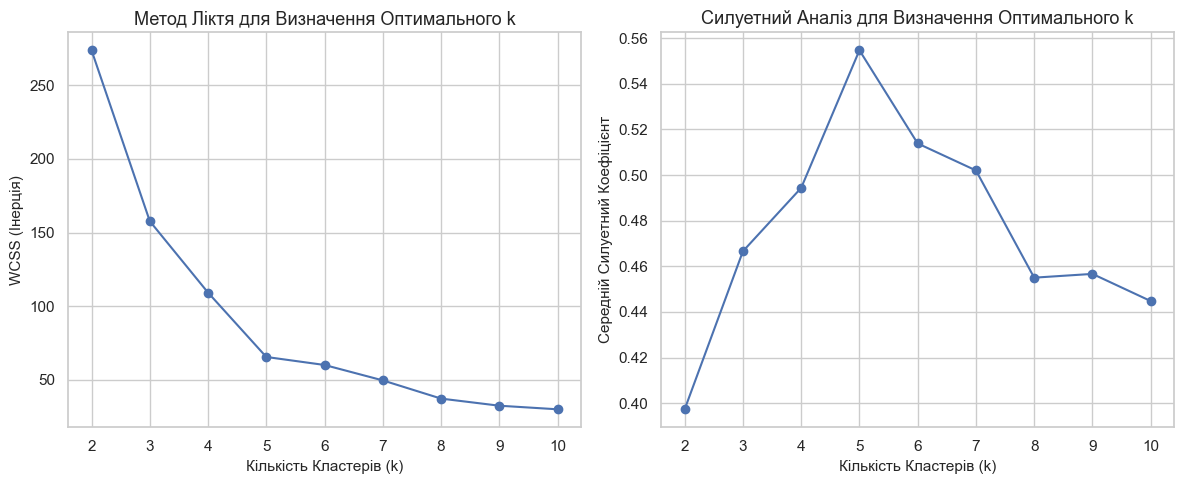

In [8]:
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Метод Ліктя для Визначення Оптимального k', fontsize=13)
plt.xlabel('Кількість Кластерів (k)', fontsize=11)
plt.ylabel('WCSS (Інерція)', fontsize=11)
plt.xticks(k_range)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Силуетний Аналіз для Визначення Оптимального k', fontsize=13)
plt.xlabel('Кількість Кластерів (k)', fontsize=11)
plt.ylabel('Середній Силуетний Коефіцієнт', fontsize=11)
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

### З методу ліктя видно, що в точці 5 графік помітно уповільнються, що може свідчити, що `k=5`.  Графік силуетного аналізу показує, що найвищий середній коефіцієнт силуету досягається при `k=5`. Це свідчить про те, що при 5 кластерах структура поділу є найкращою з точки зору щільності та розділеності кластерів. Тому обираємо `k=5`.

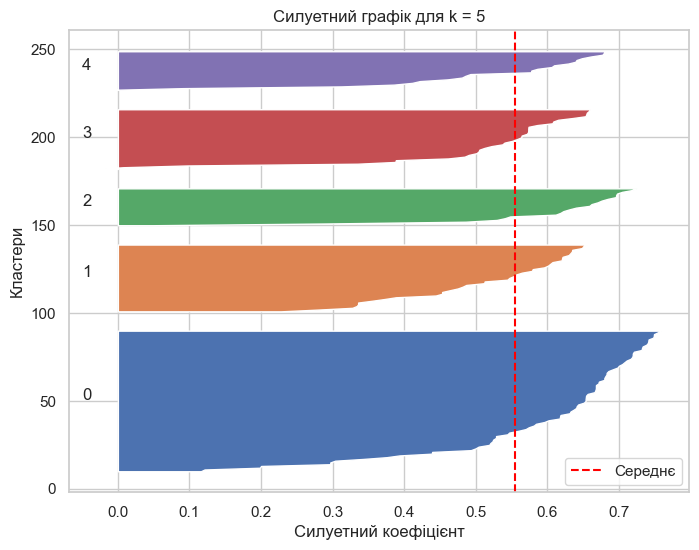

In [9]:
k_opt = 5

kmeans = KMeans(n_clusters=k_opt, init='k-means++', n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

silhouette_vals = silhouette_samples(features_scaled, kmeans_labels)

plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(k_opt):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == i]
    cluster_silhouette_vals.sort()
    cluster_size = len(cluster_silhouette_vals)
    y_upper = y_lower + cluster_size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + cluster_size / 2, str(i))
    y_lower = y_upper + 10

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--", label="Середнє")
plt.xlabel("Силуетний коефіцієнт")
plt.ylabel("Кластери")
plt.title("Силуетний графік для k = 5")
plt.legend()
plt.grid(True)
plt.show()

### В результаті візуальної оцінки якості кластерів можна зробити висновок, що всі кластери мають досить високі значення силуетного коефіціента. Це свідчить про чітке розділення кластерів та гарну кластеризацію без перекриття. Особливо добре виділяється кластер 0, який має найбільше щільність та найвищі коефіцієнти.

In [10]:
features['KMeans_Cluster'] = kmeans_labels

print(f"\nМітки кластерів K-Means (k={k_opt}) додано до даних.")
print("Розподіл клієнтів за кластерами:")
print(features['KMeans_Cluster'].value_counts().sort_index())


Мітки кластерів K-Means (k=5) додано до даних.
Розподіл клієнтів за кластерами:
KMeans_Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


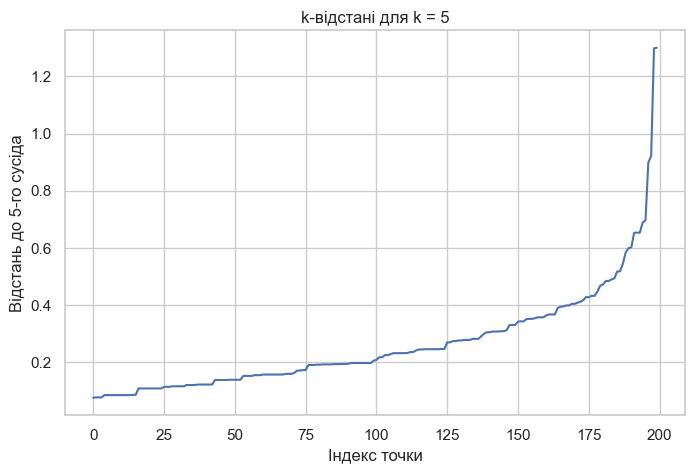

In [11]:
k = 5

neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(features_scaled)
distances, indices = nbrs.kneighbors(features_scaled)

k_distances = distances[:, k - 1]
k_distances = np.sort(k_distances)

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title(f"k-відстані для k = {k}")
plt.xlabel("Індекс точки")
plt.ylabel(f"Відстань до {k}-го сусіда")
plt.grid(True)
plt.show()

In [12]:
dbscan = DBSCAN(eps=0.355, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

features['DBSCAN_Cluster'] = dbscan_labels

print("Мітки кластерів DBSCAN додано до даних.")
print("Розподіл клієнтів за кластерами (включаючи викиди -1):")
print(features['DBSCAN_Cluster'].value_counts().sort_index())

Мітки кластерів DBSCAN додано до даних.
Розподіл клієнтів за кластерами (включаючи викиди -1):
DBSCAN_Cluster
-1    21
 0    16
 1    12
 2     7
 3    89
 4    32
 5    23
Name: count, dtype: int64


In [13]:
kmeans_labels = features['KMeans_Cluster']
dbscan_labels = features['DBSCAN_Cluster']

silhouette_kmeans = silhouette_score(features_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(features_scaled, dbscan_labels)

dbi_kmeans = davies_bouldin_score(features_scaled, kmeans_labels)
dbi_dbscan = davies_bouldin_score(features_scaled, dbscan_labels)

print(f"\nSilhouette Score (KMeans): {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index (KMeans): {dbi_kmeans:.4f}")
print(f"\nSilhouette Score (DBSCAN): {silhouette_dbscan:.4f}")
print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan:.4f}")


Silhouette Score (KMeans): 0.5547
Davies-Bouldin Index (KMeans): 0.5722

Silhouette Score (DBSCAN): 0.4430
Davies-Bouldin Index (DBSCAN): 1.2663


### В результаті оцінки якості видно, що алгоритм `K-Means` продемонстував кращі показники якості кластерізації, ніж `DBSCAN`, як за `Silhouette Score` так і за `DBI`. Це вказує на більш щільні та чітко відокремлені кластери.

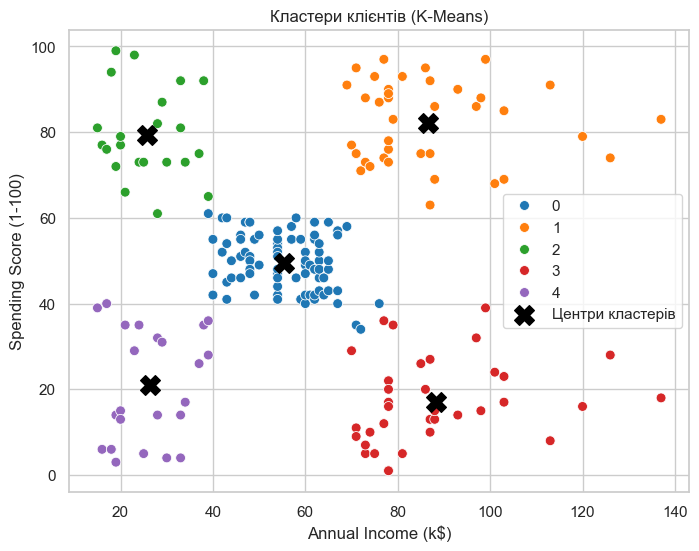

In [14]:
centers_scaled = kmeans.cluster_centers_
centers_unscaled = scaler.inverse_transform(centers_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=features,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    palette='tab10',
    legend='full',
    s=50
)

plt.scatter(
    centers_unscaled[:, 0],
    centers_unscaled[:, 1],
    c='black',
    s=200,
    marker='X',
    label='Центри кластерів'
)

plt.title('Кластери клієнтів (K-Means)')
plt.legend()
plt.grid(True)
plt.show()

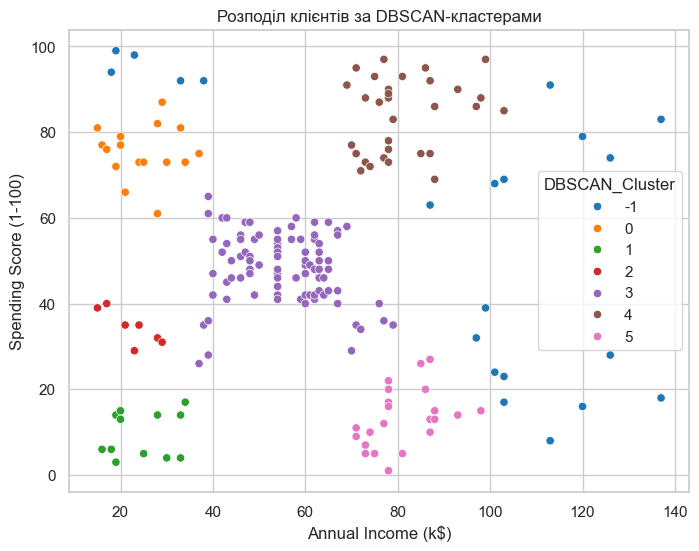

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=features['Annual Income (k$)'],
    y=features['Spending Score (1-100)'],
    hue=features['DBSCAN_Cluster'],
    palette='tab10',
    legend='full'
)
plt.title('Розподіл клієнтів за DBSCAN-кластерами')
plt.grid(True)
plt.show()

### В результаті візуалізації кластерізації також видно, що в `K-Means` чіткіше відокремлені кластери, ніж в `DBSCAN`.

# <span style="color:white; font-size:1.4em;">Завдання 3</span>

In [16]:
kmeans_profile  = features.groupby('KMeans_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

display(kmeans_profile)

,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


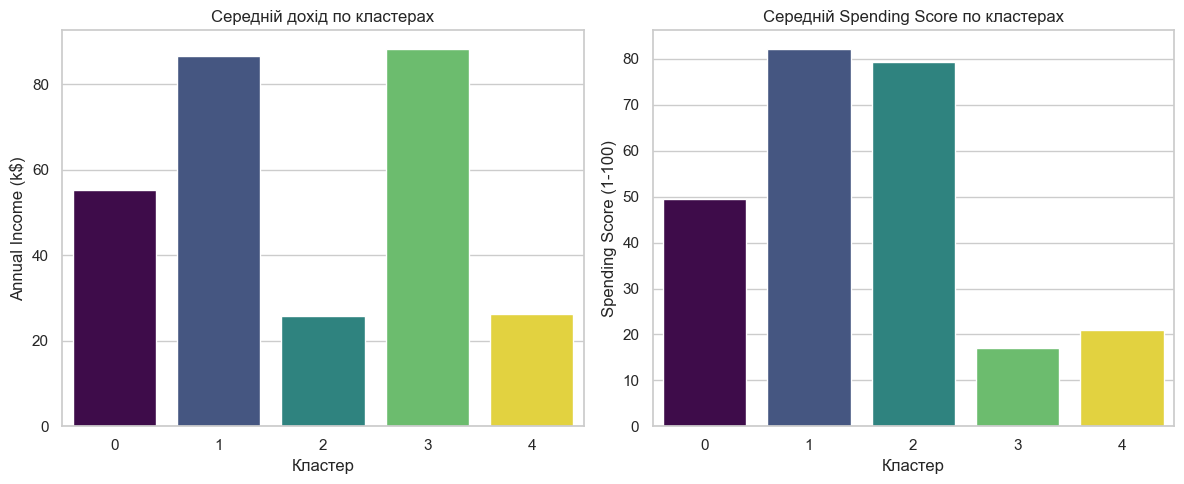

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(
    data=kmeans_profile.reset_index(),
    x='KMeans_Cluster',
    y='Annual Income (k$)',
    hue='KMeans_Cluster',
    palette='viridis',
    legend=False
)
plt.title('Середній дохід по кластерах')
plt.xlabel('Кластер')
plt.ylabel('Annual Income (k$)')

plt.subplot(1, 2, 2)
sns.barplot(
    data=kmeans_profile.reset_index(),
    x='KMeans_Cluster',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    palette='viridis',
    legend=False
)
plt.title('Середній Spending Score по кластерах')
plt.xlabel('Кластер')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

In [18]:
kmeans_average = features.groupby('KMeans_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

kmeans_average['Description'] = [
    'Стандартні клієнти',
    'Марнотрати з високим доходом',
    'Марнотрати з низьким доходом',
    'Ощадливі з високим доходом',
    'Ощадливі з низьким доходом'
]

kmeans_average['Characteristic'] = [
    'Типові споживачі з помірними доходами та витратами',
    'Забезпечені клієнти, схильні до витрат',
    'Низький дохід, але висока витратна активність — цінні для бізнесу',
    'Клієнти з високим доходом, але невеликими витратами — незацікавлені',
    'Малозабезпечена аудиторія, що витрачає мало — малоперспективна'
]

pd.set_option('display.max_colwidth', None)
display(kmeans_average)


,KMeans_Cluster,Annual Income (k$),Spending Score (1-100),Description,Characteristic
0,0,55.296296,49.518519,Стандартні клієнти,Типові споживачі з помірними доходами та витратами
1,1,86.538462,82.128205,Марнотрати з високим доходом,"Забезпечені клієнти, схильні до витрат"
2,2,25.727273,79.363636,Марнотрати з низьким доходом,"Низький дохід, але висока витратна активність — цінні для бізнесу"
3,3,88.200000,17.114286,Ощадливі з високим доходом,"Клієнти з високим доходом, але невеликими витратами — незацікавлені"
4,4,26.304348,20.913043,Ощадливі з низьким доходом,"Малозабезпечена аудиторія, що витрачає мало — малоперспективна"


### Результати `K-Means` та `DBSCAN` кластерізації виявились досить схожими, однак мають деякі відміності. `K-Means` отримав 5 кластерів, які чітко розподілились на: 0 - середній дохід та середні витрати, стандартні клієнти; 1 - високий дохід та високі витрати, марнотрати з високим доходом	; 2 - низький дохід та високі витрати, марнотрати з низьким доходом; 3 - високий дохід та низькі витрати, ощадливі з високим доходом; 4 - низький дохід та низьки витрати, ощадливі з низьким доходом. Натомість `DBSCAN` знайшов 6 кластерів, кластер з низьким доходом та низькими витратами розбив на два кластери: з низьким доходом та низькими витратами та з низьким доходом та середньо-низькими витратами, а також видилів 21 викидів.

In [19]:
features.to_csv('Mall_Customers_With_Clustering.csv', index=False, encoding='utf-8-sig')
print("Збережено customer_clusters.csv")

kmeans_average.to_csv('cluster_profiles.csv', index=False, encoding='utf-8-sig')
print("Збережено cluster_profiles.csv")


Збережено customer_clusters.csv
Збережено cluster_profiles.csv
